In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%matplotlib notebook

In [3]:
import numpy as np
import matplotlib.pyplot as plt


In [4]:
ifile=open('MeshForRichard/extended_mesh_4_richard.x','r')

dims=[]
blocks=[]
count=0
nb=9
it_=0
jt_=0
ib=0
k=0
for line in ifile:
    temp=line.split()
    if count==0:
        nb=int(temp[0])
        print nb
    elif count<=nb:
        dims.append([int(temp[0]),int(temp[1])])
        blocks.append(np.empty([dims[-1][0],dims[-1][1],2]))
        print dims[-1]
    else:
        nel=len(temp)
        for n in range(nel):
            blocks[ib][it_,jt_,k]=float(temp[n])
            it_+=1
            if it_>=dims[ib][0]:
                it_=0
                jt_+=1
            if jt_>=dims[ib][1]:
                jt_=0
                k+=1
            if k==2:
                k=0
                ib+=1
    if ib==nb:
        break
    count +=1
ifile.close()

41
[128, 1]
[96, 1]
[128, 1]
[96, 1]
[64, 1]
[128, 1]
[64, 1]
[64, 1]
[96, 1]
[64, 1]
[320, 1]
[64, 1]
[320, 1]
[320, 1]
[64, 1]
[320, 1]
[64, 1]
[320, 1]
[64, 1]
[64, 1]
[128, 1]
[64, 1]
[128, 1]
[64, 1]
[128, 1]
[150, 1]
[150, 1]
[150, 1]
[64, 1]
[64, 1]
[128, 96]
[128, 64]
[96, 64]
[320, 64]
[320, 64]
[320, 64]
[64, 64]
[128, 64]
[128, 64]
[64, 150]
[64, 150]


In [5]:
#extent outlet by simple projection
dims=dims[30:]
blocks=blocks[30:]

<IPython.core.display.Javascript object>


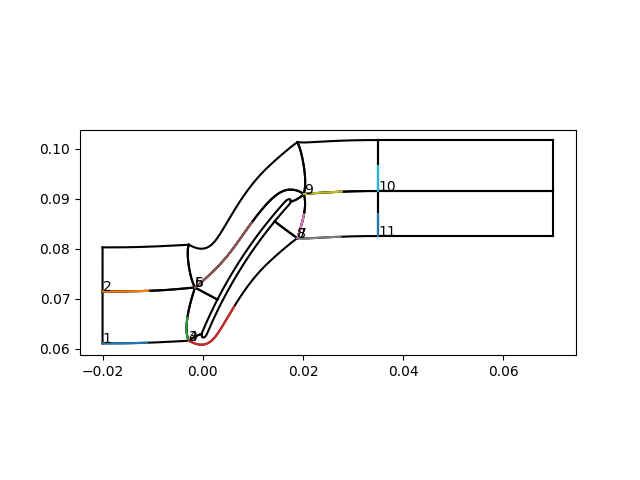

In [6]:
plt.figure()
plt.axes(aspect=1.)
#plt.plot(blocks[0][:,0,0],blocks[0][:,0,1],'x-')
for ib in range(11):
    nx,ny=dims[ib]
    #plt.scatter(blocks[ib][:,:,0],blocks[ib][:,:,1])
    plt.plot(blocks[ib][:,0,0],blocks[ib][:,0,1],'k')
    plt.plot(blocks[ib][:,-1,0],blocks[ib][:,-1,1],'k')
    plt.plot(blocks[ib][0,:,0],blocks[ib][0,:,1],'k')
    plt.plot(blocks[ib][-1,:,0],blocks[ib][-1,:,1],'k')
for ib in range(11):
    nx,ny=dims[ib]
    plt.text(blocks[ib][0,0,0],blocks[ib][0,0,1],'%i'%(ib+1))
    plt.plot(blocks[ib][:nx/2,0,0],blocks[ib][:nx/2,0,1])    

In [7]:
for ib in [9,10]:
    nx,ny,nv=blocks[ib].shape
    temp=np.empty([ny,nx,nv])
    temp[:,:,0]=np.transpose(blocks[ib][:,:,0])
    temp[:,:,1]=np.transpose(blocks[ib][:,:,1])
    blocks[ib]=temp
print blocks[7].shape,blocks[10].shape

(128, 64, 2) (150, 64, 2)


In [8]:
#merge blocks
dims[7]=[dims[7][0]+dims[10][1]-1,dims[7][1]]
blocks[7]=np.concatenate([blocks[7],blocks[10][1:,:]],axis=0)
dims[8]=[dims[8][0]+dims[9][1]-1,dims[8][1]]
blocks[8]=np.concatenate([blocks[8],blocks[9][1:,:]],axis=0)

<IPython.core.display.Javascript object>


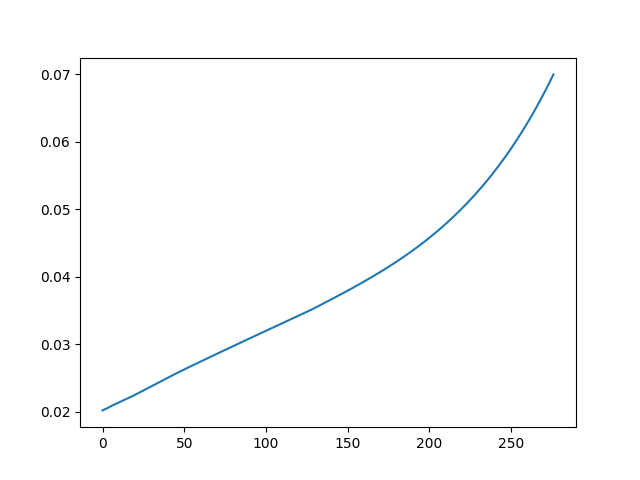

<IPython.core.display.Javascript object>


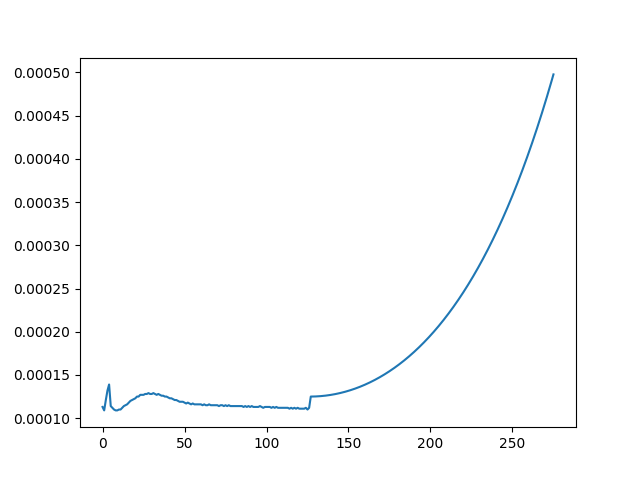

In [9]:
plt.figure()
plt.plot(blocks[8][:,0,0])
plt.figure()
plt.plot(np.diff(blocks[8][:,0,0]))

<IPython.core.display.Javascript object>


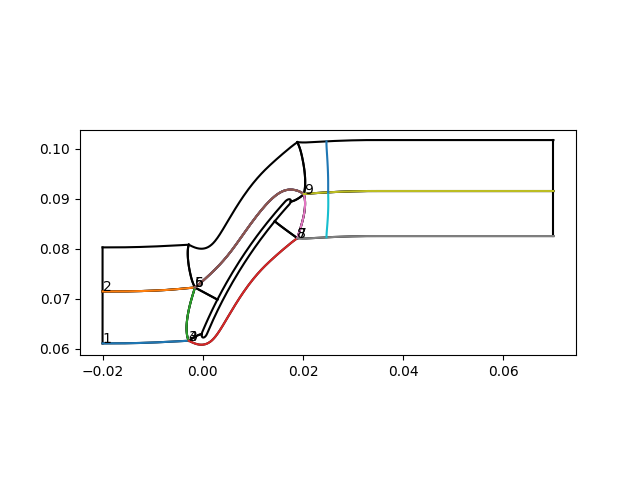

In [10]:
plt.figure()
plt.axes(aspect=1.)
#plt.plot(blocks[0][:,0,0],blocks[0][:,0,1],'x-')
for ib in range(9):
    nx,ny=dims[ib]
    #plt.scatter(blocks[ib][:,:,0],blocks[ib][:,:,1])
    plt.plot(blocks[ib][:,0,0],blocks[ib][:,0,1],'k')
    plt.plot(blocks[ib][:,-1,0],blocks[ib][:,-1,1],'k')
    plt.plot(blocks[ib][0,:,0],blocks[ib][0,:,1],'k')
    plt.plot(blocks[ib][-1,:,0],blocks[ib][-1,:,1],'k')
for ib in range(9):
    nx,ny=dims[ib]
    plt.text(blocks[ib][0,0,0],blocks[ib][0,0,1],'%i'%(ib+1))
    plt.plot(blocks[ib][:nx,0,0],blocks[ib][:nx,0,1])   
for ib in range(7,9):
    nx,ny=dims[ib]
    plt.plot(blocks[ib][40,:,0],blocks[ib][40,:,1])       

In [11]:
# get the same i and j direction as for regular cascade setup
ib=3
nx,ny=dims[ib-1]
tmp_=blocks[ib-1]
dims[ib-1]=[ny,nx]
nx,ny=dims[ib-1]
new=np.empty([nx,ny,2])
for k in range(2):
    for j in range(ny):
        for i in range(nx):
            new[i,j,k]=tmp_[j,i,k]
blocks[ib-1]=new

ib=4
nx,ny=dims[ib-1]
tmp_=blocks[ib-1]
dims[ib-1]=[ny,nx]
nx,ny=dims[ib-1]
new=np.empty([nx,ny,2])
for k in range(2):
    for j in range(ny):
        for i in range(nx):
            new[i,j,k]=tmp_[-j-1,i,k]           
blocks[ib-1]=new

ib=5
nx,ny=dims[ib-1]
tmp_=blocks[ib-1]
dims[ib-1]=[ny,nx]
nx,ny=dims[ib-1]
new=np.empty([nx,ny,2])
for k in range(2):
    for j in range(ny):
        for i in range(nx):
            new[i,j,k]=tmp_[j,i,k]
            
blocks[ib-1]=new
ib=6
nx,ny=dims[ib-1]
tmp_=blocks[ib-1]
dims[ib-1]=[ny,nx]
nx,ny=dims[ib-1]
new=np.empty([nx,ny,2])
for k in range(2):
    for j in range(ny):
        for i in range(nx):
            new[i,j,k]=tmp_[j,-i-1,k]
blocks[ib-1]=new

ib=7
nx,ny=dims[ib-1]
tmp_=blocks[ib-1]
dims[ib-1]=[ny,nx]
nx,ny=dims[ib-1]
new=np.empty([nx,ny,2])
for k in range(2):
    for j in range(ny):
        for i in range(nx):
            new[i,j,k]=tmp_[-j-1,i,k]
blocks[ib-1]=new

ib=8
nx,ny=dims[ib-1]
tmp_=blocks[ib-1]
new=np.empty([nx,ny,2])
for k in range(2):
    for j in range(ny):
        for i in range(nx):
            new[i,j,k]=tmp_[-i-1,-j-1,k]
blocks[ib-1]=new
ib=9
nx,ny=dims[ib-1]
tmp_=blocks[ib-1]
new=np.empty([nx,ny,2])
for k in range(2):
    for j in range(ny):
        for i in range(nx):
            new[i,j,k]=tmp_[-i-1,-j-1,k]
blocks[ib-1]=new

<IPython.core.display.Javascript object>


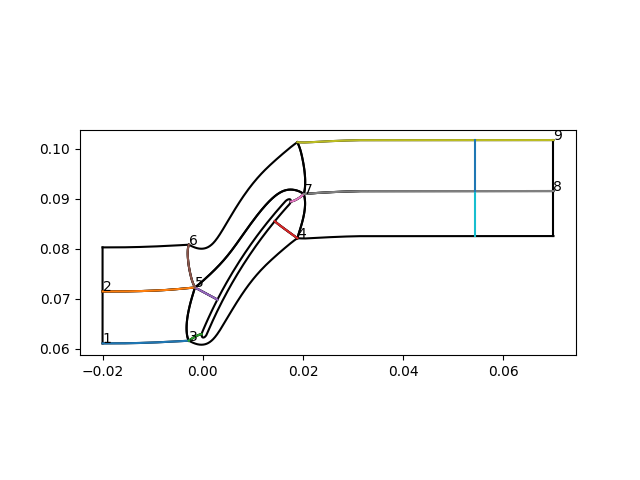

In [12]:
plt.figure()
plt.axes(aspect=1.)
#plt.plot(blocks[0][:,0,0],blocks[0][:,0,1],'x-')
for ib in range(9):
    nx,ny=dims[ib]
    #plt.scatter(blocks[ib][:,:,0],blocks[ib][:,:,1])
    plt.plot(blocks[ib][:,0,0],blocks[ib][:,0,1],'k')
    plt.plot(blocks[ib][:,-1,0],blocks[ib][:,-1,1],'k')
    plt.plot(blocks[ib][0,:,0],blocks[ib][0,:,1],'k')
    plt.plot(blocks[ib][-1,:,0],blocks[ib][-1,:,1],'k')
for ib in range(9):
    nx,ny=dims[ib]
    plt.text(blocks[ib][0,0,0],blocks[ib][0,0,1],'%i'%(ib+1))
    plt.plot(blocks[ib][:nx,0,0],blocks[ib][:nx,0,1])   
for ib in range(7,9):
    nx,ny=dims[ib]
    plt.plot(blocks[ib][40,:,0],blocks[ib][40,:,1])  

<IPython.core.display.Javascript object>


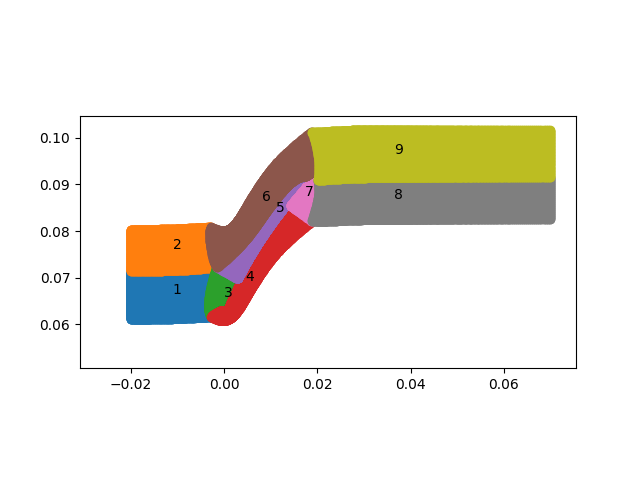

In [13]:
plt.figure()
plt.axes(aspect=1.)
#plt.plot(blocks[0][:,0,0],blocks[0][:,0,1],'x-')
for ib in range(9):
    nx,ny=dims[ib]
    plt.scatter(blocks[ib][:,:,0],blocks[ib][:,:,1])
    plt.text(blocks[ib][nx/2,ny/2,0],blocks[ib][nx/2,ny/2,1],'%i'%(ib+1))

In [14]:
for ib in range(9):
    print dims[ib]

[128, 96]
[128, 64]
[64, 96]
[64, 320]
[64, 320]
[64, 320]
[64, 64]
[277, 64]
[277, 64]


<IPython.core.display.Javascript object>


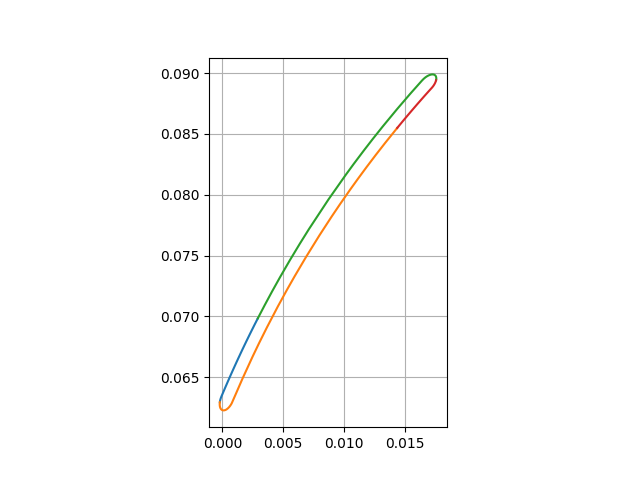

In [15]:
plt.figure()
plt.axes(aspect=1)
for ib in [2,3,4,6]:
    plt.plot(blocks[ib][-1,:,0],blocks[ib][-1,:,1])
plt.grid()

In [17]:
x1=0
y1=0.0623
x2=0.01747
y2=0.0898
chord=np.sqrt((x2-x1)**2+(y2-y1)**2)
print chord

0.0325799155923


In [18]:
#scale grid
for ib in range(9):
    blocks[ib][:,:]=(blocks[ib][:,:]-[x1,y1])/chord

<IPython.core.display.Javascript object>


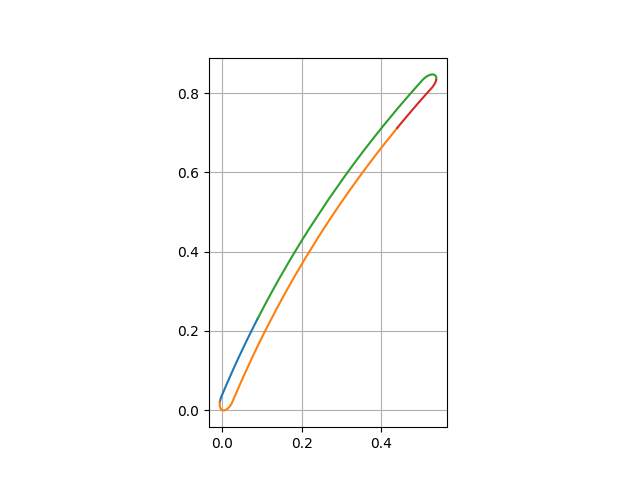

In [19]:
plt.figure()
plt.axes(aspect=1)
for ib in [2,3,4,6]:
    plt.plot(blocks[ib][-1,:,0],blocks[ib][-1,:,1])
plt.grid()

<IPython.core.display.Javascript object>


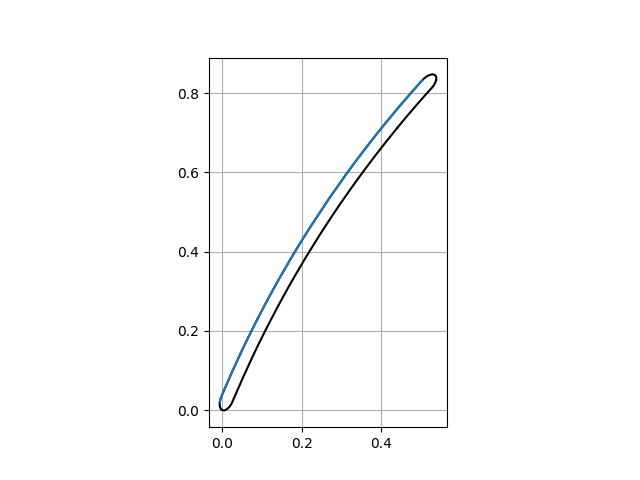

In [20]:
camb=np.concatenate([blocks[2][-1,:],blocks[4][-1,:260]])
plt.figure()
plt.axes(aspect=1)
for ib in [2,3,4,6]:
    plt.plot(blocks[ib][-1,:,0],blocks[ib][-1,:,1],'k')
plt.plot(camb[:,0],camb[:,1])
plt.grid()

In [21]:
ofile=open('camb.dat','w')
ofile.write('%i\n'%len(camb[::5,0]))
for j in range(len(camb[::5,0])):
    ofile.write('%15.8f , %15.8f \n'%(camb[j*5,0],camb[j*5,1]))
ofile.close()

In [22]:
for ib in range(9):
    ofile=open('z_r_grid_%i.dat'%(ib+1),'w')
    nx,ny=dims[ib]
    ofile.write('%i , %i \n'%(nx,ny))
    for j in range(ny):
        for i in range(nx):
            ofile.write('%20.15f , %20.15f \n'%(blocks[ib][i,j,0],blocks[ib][i,j,1]))
    ofile.close()